# Panorama Stitcher

## Import packages

In [214]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## BGR to RGB converter

In [215]:
def convert_image(img):
    # enables mayplotlib to plot OpenCV images,
    # converts image from BGR to RGB
    new_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return new_img

## Import images and resize

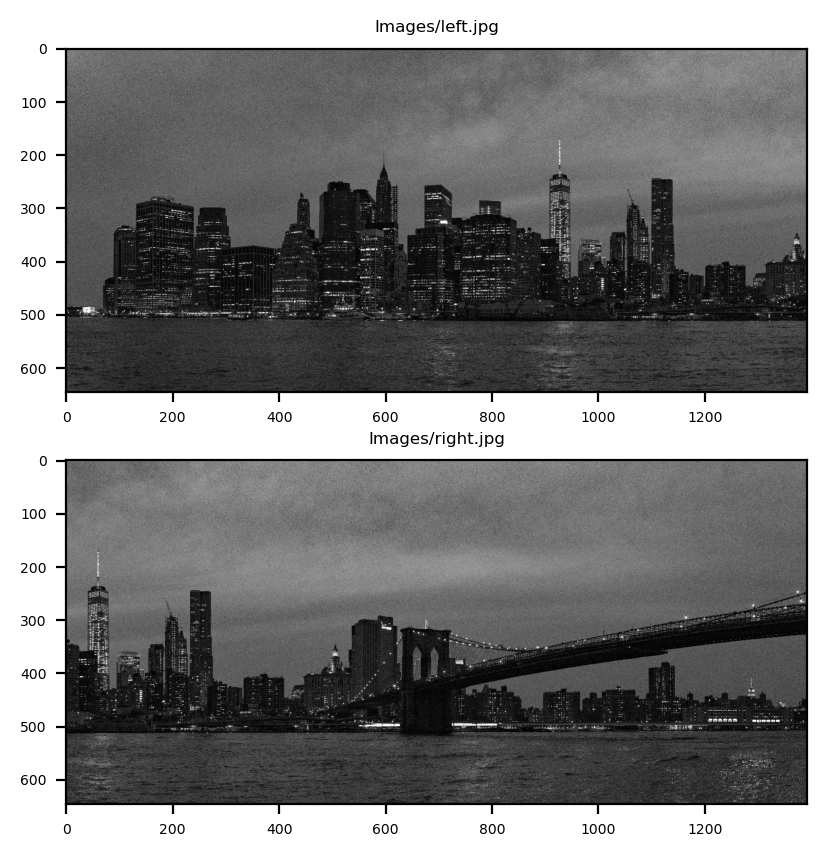

In [216]:
# import images, resize x0.5, convert to greyscale
img_ = cv2.imread("Images/left.jpg")
img_ = cv2.resize(img_, (0,0), None, 0.2, 0.2)
img1 = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)

img = cv2.imread("Images/right.jpg")
img = cv2.resize(img, (0,0), None, 0.2, 0.2)
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# display image
plt.rc('font', size=5)
fig, ax = plt.subplots(2, 1, figsize=(5, 5), dpi=200)
ax[0].title.set_text("Images/left.jpg")
ax[1].title.set_text("Images/right.jpg")
ax[0].imshow(convert_image(img1))
ax[1].imshow(convert_image(img2))
plt.show()

## Find keypoints

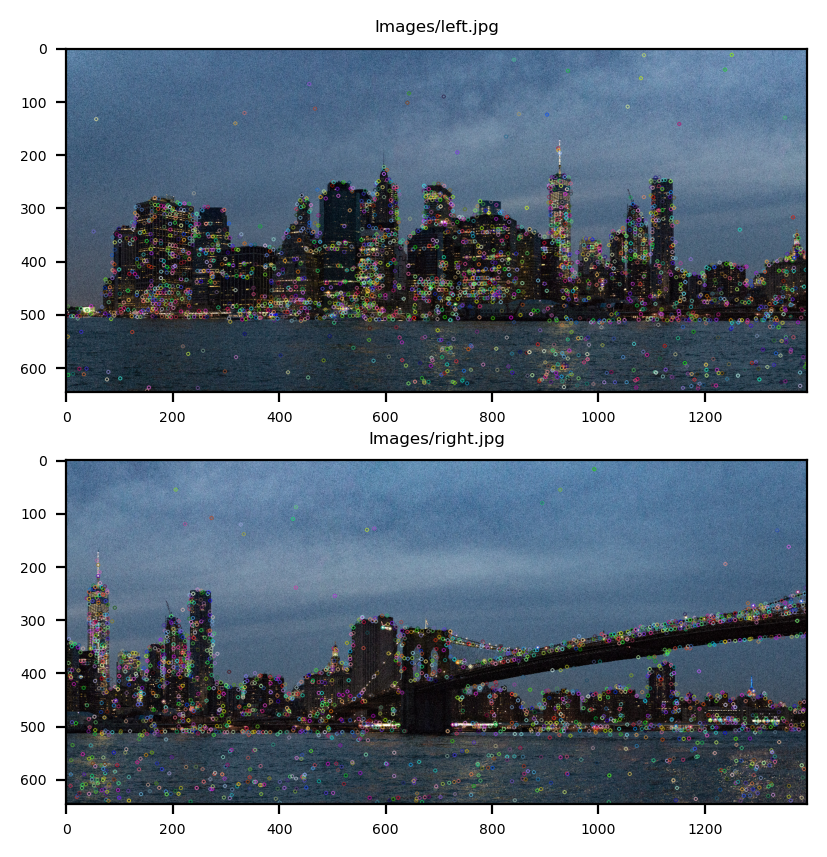

In [217]:
# set SIFT descriptor
descriptor = cv2.xfeatures2d.SIFT_create()

# get keypoints
(kps1, des1) = descriptor.detectAndCompute(img1, None)
(kps2, des2) = descriptor.detectAndCompute(img2, None)

# draw keypoints on images
k_img1 = cv2.drawKeypoints(img_, kps1, None)
k_img2 = cv2.drawKeypoints(img, kps2, None)

# display images
plt.rc('font', size=5)
fig, ax = plt.subplots(2, 1, figsize=(5, 5), dpi=200)
ax[0].title.set_text("Images/left.jpg")
ax[1].title.set_text("Images/right.jpg")
ax[0].imshow(convert_image(k_img1))
ax[1].imshow(convert_image(k_img2))
plt.show()

## Feature matching

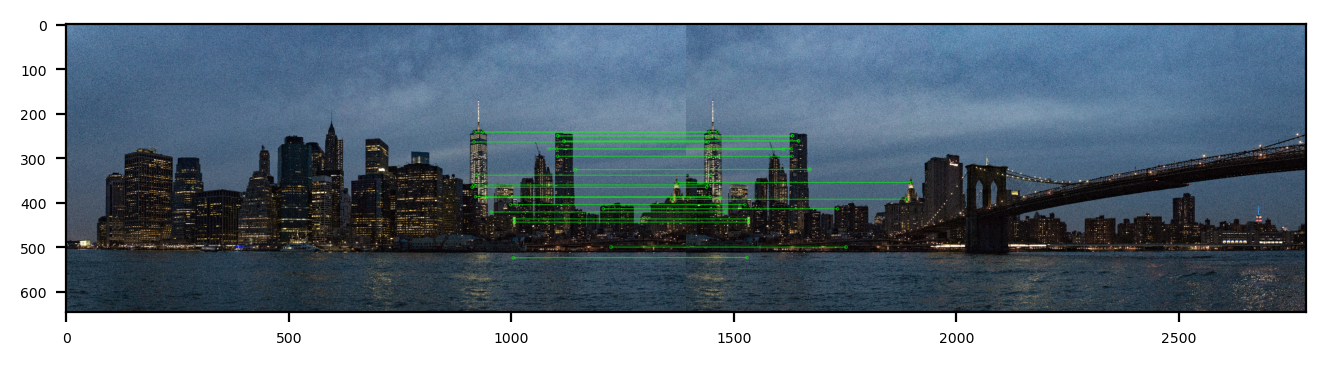

In [218]:
# set up brute force matcher
# cross check performs ratio testing as proposed by authors of SIFT paper
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# match the descriptors
matches = bf.match(des1, des2)

# Sort matches in order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# match color
draw_params = dict(matchColor = (0,255,0), singlePointColor = None, flags = 2)

# Draw first 10 matches.
img3 = cv2.drawMatches(img_, kps1, img, kps2, matches[:25], None, **draw_params)

# display image and matches
plt.rc('font', size=5)
plt.figure(figsize=(8, 8), dpi=200)
plt.imshow(convert_image(img3))
plt.show()